In [36]:
# !pip install -r requirements.txt

In [37]:
# !pip install seaborn

In [54]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
#import %matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [55]:
df=pd.read_csv("StudentsPerformance.csv")

In [56]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [57]:
df.shape

(1000, 8)

In [58]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [59]:
df.duplicated().sum()

0

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [61]:
num_feature=[feature for feature in df.columns if df[feature].dtype=='int64']
cat_feature=[feature for feature in df.columns if df[feature].dtype=='object']

print(f"There are {len(num_feature)} numerical feature.\n i.e {num_feature}")
print(f"There are {len(cat_feature)} categorical feature.\n i.e {cat_feature}")

There are 3 numerical feature.
 i.e ['math score', 'reading score', 'writing score']
There are 5 categorical feature.
 i.e ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


##### Make "Total Score" and "Average"

In [62]:
df["total score"]=df["math score"]+df["reading score"]+df["writing score"]
df["average"]=df["total score"]/3

In [63]:
# df.head()

##### Best Performed student

In [64]:
full_marks_reading=df[df["reading score"]==100]["average"].count()
full_marks_writting=df[df["writing score"]==100]["average"].count()
full_marks_math=df[df["math score"]==100]["average"].count()

print(f"Total no. of student obtained full marks in maths = {(full_marks_math)}")
print(f"Total no. of student obtained full marks in reading = {(full_marks_reading)}")
print(f"Total no. of student obtained full marks in wrtting = {(full_marks_writting)}")

Total no. of student obtained full marks in maths = 7
Total no. of student obtained full marks in reading = 17
Total no. of student obtained full marks in wrtting = 14


##### Worst performed student

In [65]:
worst_marks_reading=df[df["reading score"]<20]["average"].count()
worst_marks_writting=df[df["writing score"]<20]["average"].count()
worst_marks_math=df[df["math score"]<20]["average"].count()

print(f"Total no. of student obtained less than 20 score in maths = {(worst_marks_math)}")
print(f"Total no. of student obtained less than 20 score in reading = {(worst_marks_reading)}")
print(f"Total no. of student obtained less than 20 score in wrtting = {(worst_marks_writting)}")

Total no. of student obtained less than 20 score in maths = 4
Total no. of student obtained less than 20 score in reading = 1
Total no. of student obtained less than 20 score in wrtting = 3


#### Insights

Student shows best performance in reading and worst in maths


#### Visualization


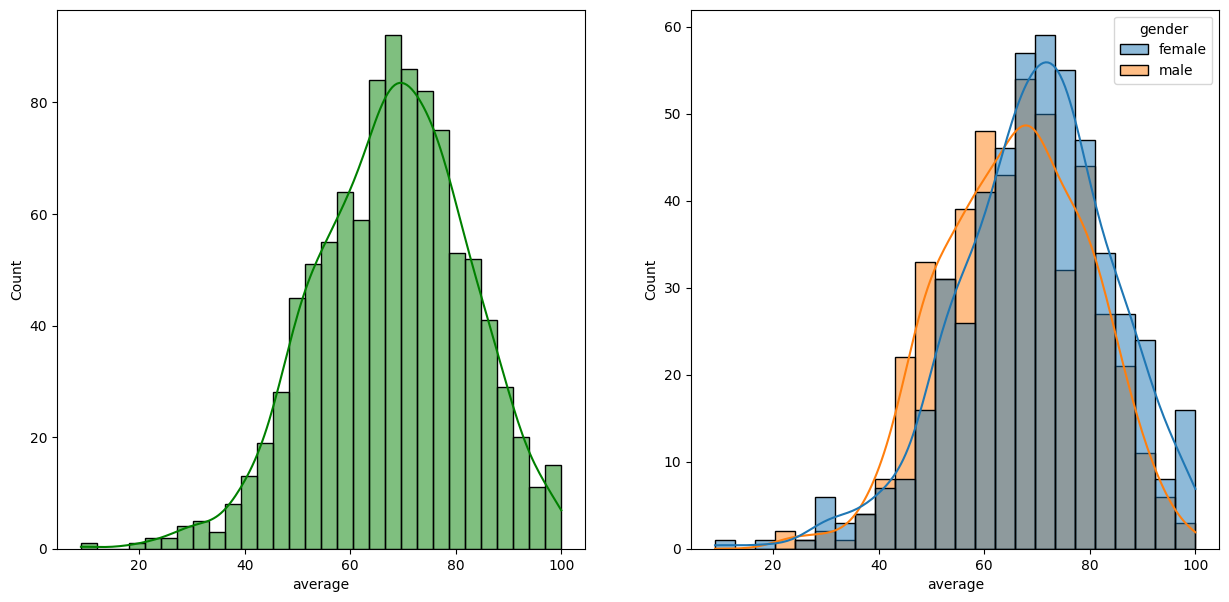

In [66]:
fig, axs=plt.subplots(1,2,figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x="average",bins=30, kde=True, color="g")
plt.subplot(122)
sns.histplot(data=df,x="average", kde=True, hue="gender")
plt.show()

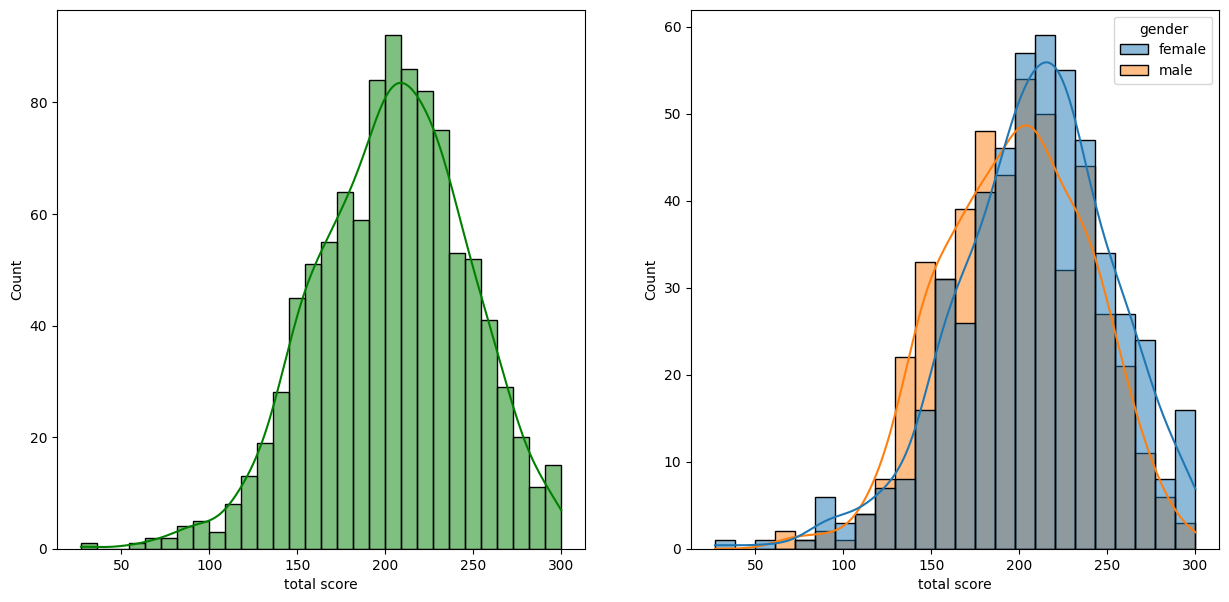

In [67]:
fig, axs=plt.subplots(1,2,figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x="total score",bins=30, kde=True, color="g")
plt.subplot(122)
sns.histplot(data=df,x="total score", kde=True, hue="gender")
plt.show()

<Axes: xlabel='average', ylabel='Count'>

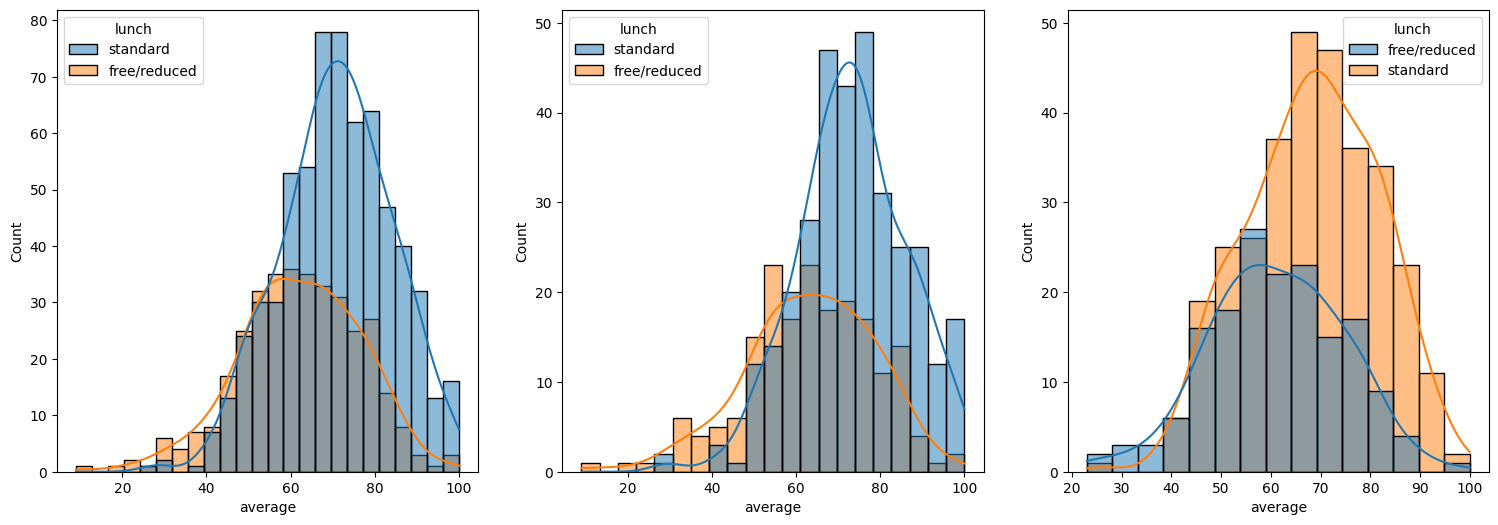

In [68]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x="average", kde=True, hue="lunch")
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue="lunch")
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue="lunch")

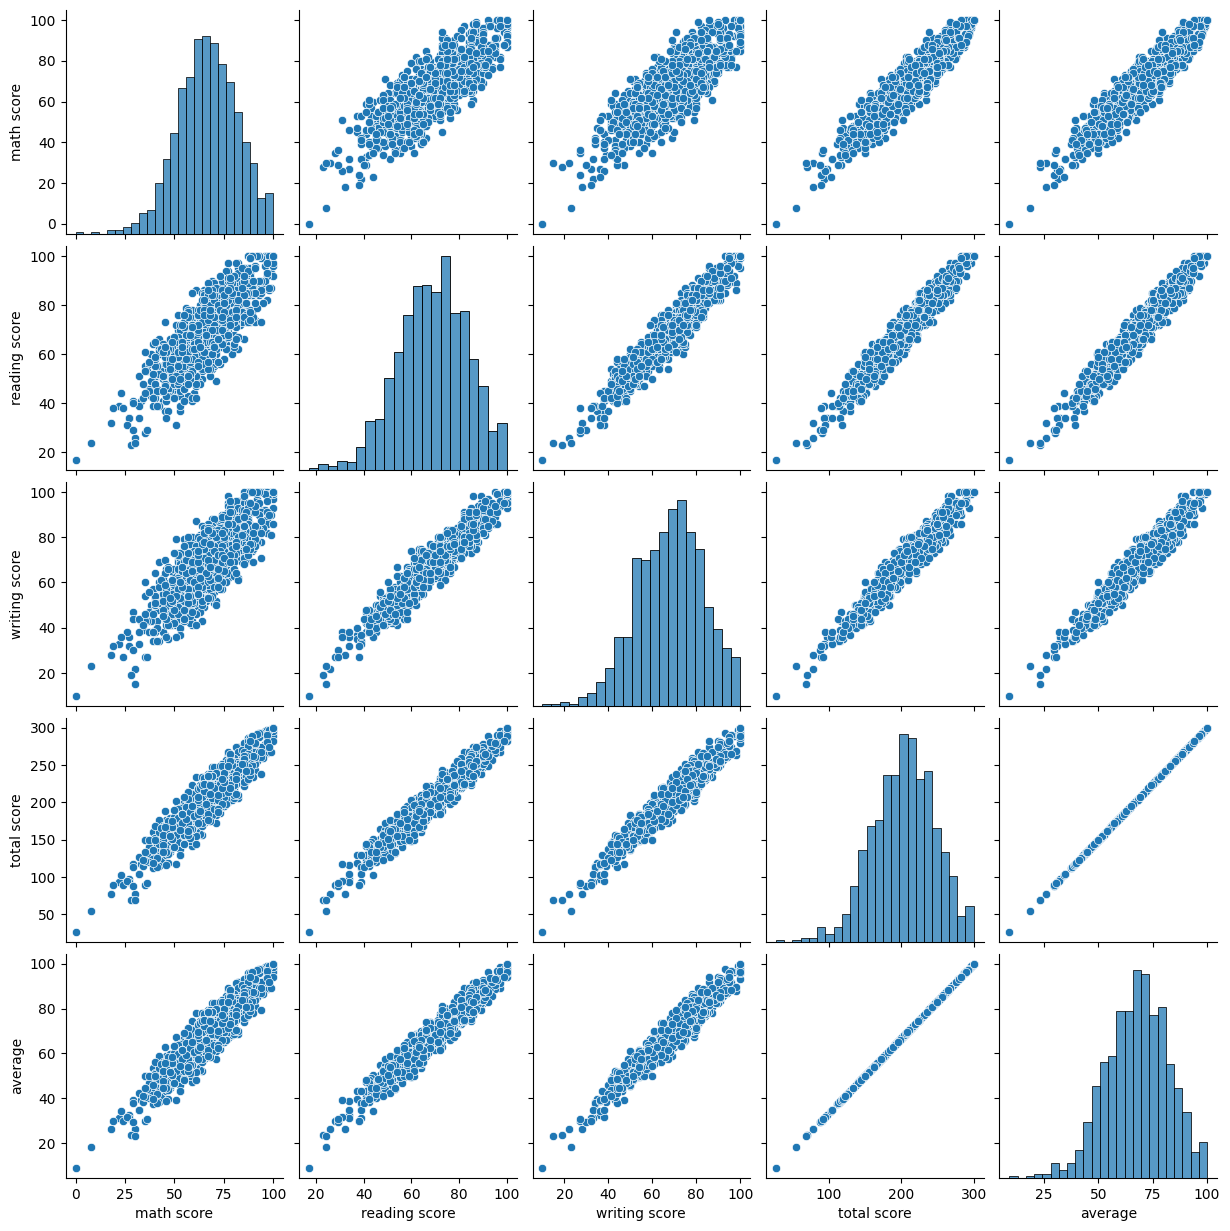

In [69]:
sns.pairplot(df, kind='scatter')